## Import libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

## Load and inspect dataset

In [4]:
df = pd.read_csv(f"{os.getcwd()}\\Mall_Customers.csv")
print(df)
print(df.info())

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 column

## Clean data

In [5]:
# Checking for null values in the DataFrame
null_counts = df.isnull().sum()
null_counts

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#Rename columns for easier use of them
df.rename(columns={'Age': 'age', 'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'spending_score', 'Genre': 'gender'}, inplace=True)
df

,CustomerID,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
#Delete column CustomerID because this column has no value for hierarchical clustering
df.drop('CustomerID', axis=1, inplace=True)
df

,gender,age,income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Standardize / Preprocess data

In [8]:
# Define the columns to normalize
from sklearn.preprocessing import StandardScaler

X = df[['age', 'income', 'spending_score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

## DBSCAN

### Train model

In [9]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5)
y_dbscan = dbscan.fit_predict(X_scaled)

In [10]:
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0, -1, -1,  1,  0, -1,  0, -1,  0,  1, -1,  1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0,  1,  0, -1,  0,  2,  3,  2, -1,  2,  3,  3,  3,  2,
        3,  3,  2,  2,  2,  2,  2,  3,  2,  2,  3,  2,  2,  2,  3,  2,  2,
        3,  3,  2,  2,  2,  2,  2,  3,  2,  2,  3,  2,  2,  2,  2,  2,  3,
        2,  2,  3, -1,  2,  2,  3,  2,  2,  2,  3,  2,  3,  2,  3,  3,  2,
        2,  3,  2,  3,  2,  2,  2,  2,  2,  3,  2,  3,  3,  3,  2,  2,  2,
        2,  3,  2, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4,  3,  4, -1,  4,
        5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4,  5,
        4,  5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4, -1, -1,
        5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### Evaluating DBSCAN performance by Silhouette Score

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
print(f'Silhouette Score for eps=0.5 : {silhouette_score(X_scaled, y_dbscan)}')

Silhouette Score for eps=0.5 : 0.18451372756506046


### Selecting Value of Epsilon and Number of Points based on Silhouette Score

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_range = np.linspace(0.001,1,1000)
samples_range = np.arange(2, X_scaled.shape[0]-1)
silhouette_scores_dbscan = []

for eps in eps_range:
  for samples in samples_range :
    dbscan = DBSCAN(eps=eps, min_samples=samples)
    y_dbscan = dbscan.fit_predict(X_scaled)

    num_clusters = len(np.unique(y_dbscan))
    
    #number of clusters should be more than 1
    if num_clusters > 1:
      # Calculate the Silhouette Score
      silhouette_scores_dbscan.append({"epsilon": eps, "points": samples, "silhouette_score": silhouette_score(X_scaled, y_dbscan)})

# Searching for the maximun Silhouette Score to identify the best epsilon and number of points
max = 0;
for index, element in enumerate(silhouette_scores_dbscan):
  if silhouette_scores_dbscan[index]['silhouette_score'] > silhouette_scores_dbscan[max]['silhouette_score']:
    max = index

ss_dbscan_best_eps = silhouette_scores_dbscan[max]['epsilon']
ss_dbscan_best_points = silhouette_scores_dbscan[max]['points']
ss_dbscan_best_ss = silhouette_scores_dbscan[max]['silhouette_score']
print(f"the best epsilon is {ss_dbscan_best_eps}")
print(f"the best number of points is {ss_dbscan_best_points}")
print(f"silhouette_score is {ss_dbscan_best_ss}")

the best epsilon is 0.963
the best number of points is 9
silhouette_score is 0.31387540548974174


### Selecting Value of Epsilon and Number of Points based on CH-Index

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score

eps_range = np.linspace(0.001,1,1000)
samples_range = np.arange(2, X_scaled.shape[0]-1)
ch_indexes_dbscan = []

for eps in eps_range:
  for samples in samples_range :
    dbscan = DBSCAN(eps=eps, min_samples=samples)
    y_dbscan = dbscan.fit_predict(X_scaled)

    num_clusters = len(np.unique(y_dbscan))
    
    #number of clusters should be more than 1
    if num_clusters > 1:
      # Calculate the Silhouette Score
      ch_indexes_dbscan.append({"epsilon": eps, "points": samples, "ch_index": calinski_harabasz_score(X_scaled, y_dbscan)})

# Searching for the maximun CH-Index to identify the best epsilon and number of points
max = 0;
for index, element in enumerate(ch_indexes_dbscan):
  if ch_indexes_dbscan[index]['ch_index'] > ch_indexes_dbscan[max]['ch_index']:
    max = index

ch_dbscan_best_eps = ch_indexes_dbscan[max]['epsilon']
ch_dbscan_best_points = ch_indexes_dbscan[max]['points']
ch_dbscan_best_ch = ch_indexes_dbscan[max]['ch_index']
print(f"the best epsilon is {ch_dbscan_best_eps}")
print(f"the best number of points is {ch_dbscan_best_points}")
print(f"CH-Index is {ch_dbscan_best_ch}")

the best epsilon is 0.6
the best number of points is 10
CH-Index is 54.225491591286165


## KMeans

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

ch_indexes_list_kmeans = []

for i in range(2,21):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  y_pred = kmeans.fit_predict(X_scaled)

  ch_indexes_list_kmeans.append({'number_of_clusters': i, 'ch_index': calinski_harabasz_score(X_scaled, y_pred)})
  
ch_indexes_list_kmeans

[{'number_of_clusters': 2, 'ch_index': np.float64(107.09556673899093)},
 {'number_of_clusters': 3, 'ch_index': np.float64(101.52961865209923)},
 {'number_of_clusters': 4, 'ch_index': np.float64(125.67639662405028)},
 {'number_of_clusters': 5, 'ch_index': np.float64(123.41870976849417)},
 {'number_of_clusters': 6, 'ch_index': np.float64(134.47517082663606)},
 {'number_of_clusters': 7, 'ch_index': np.float64(126.82586409671673)},
 {'number_of_clusters': 8, 'ch_index': np.float64(117.278574406596)},
 {'number_of_clusters': 9, 'ch_index': np.float64(116.3788434774396)},
 {'number_of_clusters': 10, 'ch_index': np.float64(115.75144314579364)},
 {'number_of_clusters': 11, 'ch_index': np.float64(137.24292790683026)},
 {'number_of_clusters': 12, 'ch_index': np.float64(123.96262526509146)},
 {'number_of_clusters': 13, 'ch_index': np.float64(132.9468328264408)},
 {'number_of_clusters': 14, 'ch_index': np.float64(131.6983068779509)},
 {'number_of_clusters': 15, 'ch_index': np.float64(129.527483957

### Optimum number of clusters based on CH-Index

In [16]:
#Searching for the maximun CH-Index to identify the best number of clusters
max = 0

for index, element in enumerate(ch_indexes_list_kmeans):
  if ch_indexes_list_kmeans[index]['ch_index'] > ch_indexes_list_kmeans[max]['ch_index']:
    max = index

ch_kmeans_best = ch_indexes_list_kmeans[max]['number_of_clusters']
ch_kmeans_best_ch = ch_indexes_list_kmeans[max]['ch_index']
print(f"the best number of clusters is {ch_kmeans_best}")
print(f"CH-Index is {ch_kmeans_best_ch}")

the best number of clusters is 11
CH-Index is 137.24292790683026


### Optimum number of clusters based on Silhouette Score

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores_list_kmeans = []

for i in range(2,21):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  y_pred = kmeans.fit_predict(X_scaled)

  silhouette_scores_list_kmeans.append({'number_of_clusters': i, 'silhouette_score': silhouette_score(X_scaled, y_pred)})
  
silhouette_scores_list_kmeans

[{'number_of_clusters': 2,
  'silhouette_score': np.float64(0.33547192894004574)},
 {'number_of_clusters': 3, 'silhouette_score': np.float64(0.3579234303882264)},
 {'number_of_clusters': 4, 'silhouette_score': np.float64(0.4039582785148566)},
 {'number_of_clusters': 5,
  'silhouette_score': np.float64(0.40846873777345605)},
 {'number_of_clusters': 6,
  'silhouette_score': np.float64(0.43106526216603014)},
 {'number_of_clusters': 7, 'silhouette_score': np.float64(0.410091114520974)},
 {'number_of_clusters': 8, 'silhouette_score': np.float64(0.3673663165322295)},
 {'number_of_clusters': 9,
  'silhouette_score': np.float64(0.37442148555078425)},
 {'number_of_clusters': 10,
  'silhouette_score': np.float64(0.36186970479722974)},
 {'number_of_clusters': 11,
  'silhouette_score': np.float64(0.40861878459370105)},
 {'number_of_clusters': 12,
  'silhouette_score': np.float64(0.35689674084203643)},
 {'number_of_clusters': 13,
  'silhouette_score': np.float64(0.3856266309743293)},
 {'number_of_c

In [18]:
#Searching for the maximun Silhouette Score to identify the best number of clusters
max = 0

for index, element in enumerate(silhouette_scores_list_kmeans):
  if silhouette_scores_list_kmeans[index]['silhouette_score'] > silhouette_scores_list_kmeans[max]['silhouette_score']:
    max = index

ss_kmeans_best = silhouette_scores_list_kmeans[max]['number_of_clusters']
ss_kmeans_best_ss = silhouette_scores_list_kmeans[max]['silhouette_score']
print(f"the best number of clusters is {ss_kmeans_best}")
print(f"silhouette_score is {ss_kmeans_best_ss}")

the best number of clusters is 6
silhouette_score is 0.43106526216603014


## KMeans and DBSCAN Algorithms' Performances by CH-Index and Silhouette Score

### Silhouette Score

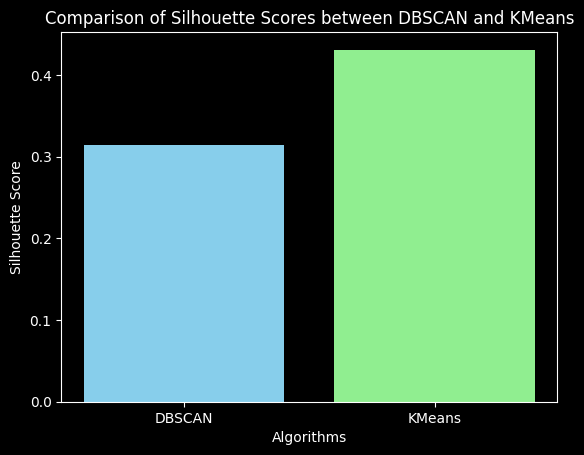

In [19]:
import matplotlib.pyplot as plt
# Data for the Silhouette Scores of DBSCAN and KMeans

# Create the bar chart
labels = ['DBSCAN', 'KMeans']
values = [ss_dbscan_best_ss, ss_kmeans_best_ss]

colors = ['skyblue', 'lightgreen']
plt.bar(labels, values, color=colors)
plt.xlabel('Algorithms')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores between DBSCAN and KMeans')
plt.show()


Silhouette Score in KMeans is higher than in DBSCAN Algorightm, hence **based on Silhouette Score KMeans is better clustering Algorithm for this dataset**.

### CH-Index

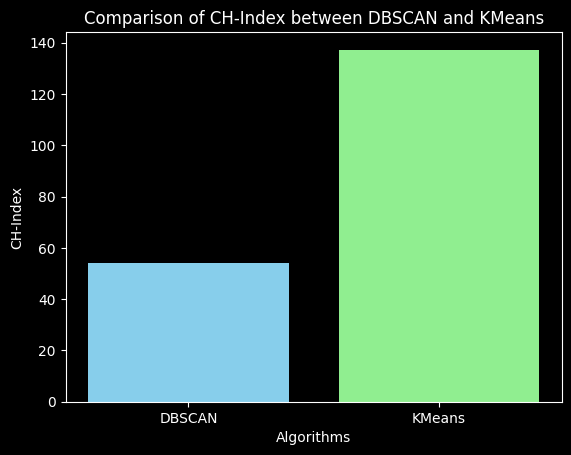

In [20]:
import matplotlib.pyplot as plt
# Data for the CH-Index of DBSCAN and KMeans

# Create the bar chart
labels = ['DBSCAN', 'KMeans']
values = [ch_dbscan_best_ch, ch_kmeans_best_ch]

colors = ['skyblue', 'lightgreen']
plt.bar(labels, values, color=colors)
plt.xlabel('Algorithms')
plt.ylabel('CH-Index')
plt.title('Comparison of CH-Index between DBSCAN and KMeans')
plt.show()

CH-Index in KMeans is higher than in DBSCAN Algorightm, hence **based on CH-Index KMeans is better clustering Algorithm for this dataset**.

## Summary

Based on Silhouette Score and CH-Index **KMeans** clustering Algorithm is **better** for the current dataset than DBSCAN Algorithm.